In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
import hollywood as hy

%reload_ext autoreload
%autoreload 2


In [63]:
data_dir = '../../data/'
movies = pd.read_csv(data_dir + 'movies.csv')
movies['production_companies'] = movies['production_companies'].apply(lambda x: literal_eval(x))

## Hollywood studios


Getting hollywood movie studios from https://en.wikipedia.org/wiki/Major_film_studios#Mini-majors



### wikipedia_hollywood_studios
The following studios were taken from wikipedia and a list constructed with the compatible studio names in our dataset:


    'Wikipedia name', 'Search term(s) used to construct dataframe'
    ------
     
    'NBCUniversal', (Universal)
    'Lucasfilm', (Lucasfilm)
    'Paramount Pictures', (Paramount)
    'Warner Bros. Pictures', (Warner)
    'New Line Cinema ', (New Line Cinema)
    'Walt Disney Pictures', (Disney)
    '20th Century Studios', (20th)
    'Columbia Pictures', (Columbia)
    'TriStar Pictures', (TriStar)
    'A24 Films', Founded 2012
    'Metro-Goldwyn-Mayer', (Metro-Goldwyn)
    'Lionsgate Films', (Lionsgate)
    'Summit Entertainment', (==)
    'STX Films', Founded 2014
    'Amblin Entertainment', (==)
    'DreamWorks Pictures', (DreamWorks)
    'Gaumont Film Company', (Gaumont)
    'Pathé Films',(Pathé)
    'StudioCanal',(==)
    'Nordisk Film', (==)
    'Constantin Film', (==)
    'Castle Rock Entertainment', (Castle Rock)
    'Monogram Pictures', (Monogram)
    'Allied Artists Pictures', (Allied Artists)
    'New Line Cinema', (==)
    'Relativity Media', (==)
    'Orion Pictures', (==)
    'Revolution Studios', (==)
    'Avco Embassy', (Avco)
    'The Weinstein Company', (Weinstein)
    'Republic Pictures', (Republic)
    'FilmDistrict', (==)
    'Focus Features', (==)
    'PolyGram Filmed Entertainment', (PolyGram)
    'Artisan Entertainment', (==)
    'Overture Films',(==)
    'Summit Entertainment', (==)
    'The Cannon Group', (Cannon Group)
    'Global Road Entertainment', Founded 2017
    'Open Road Films', Founded 2019
    'Miramax Films', (Miramax)
    'Weintraub Entertainment Group',(==)
    'CBS Films', (CBS)
    'Alchemy',(==)
    'Cinerama Releasing Corporation', (Cinerama)
    'National General Corporation', (National General)
    'Commonwealth United Corporation',(==)
    'ABC Pictures International', (ABC)
    'New World Pictures',(==)
    'Turner Pictures', (Turner)
    'Marvel Studios', (Marvel)
    'Pixar Animation Studios', (Pixar)
    'The Samuel Goldwyn Company' (Samuel Goldwyn)

#### creating hollywood studio list from wikipedia

In [10]:
# # Prep
# # creating empty dataframe
# valid_entries = pd.DataFrame(columns=['Item', 'Count'])

# # filtering our Dataset
# filtered_movies = movies[
#     (movies['prod_country'] == 'US')
#     ]

# # count data how often each studio is mentionned in dataset
# production_companies = filtered_movies['production_companies'].apply(lambda x: literal_eval(x))
# production_companies = production_companies.explode().value_counts()
# production_companies = pd.DataFrame(list(production_companies.items()), columns=['Item', 'Count'])

In [ ]:
# # go through studio names by wikipedia by hand
# studio = 'Samuel Goldwyn'
# res = production_companies['Item'].str.contains(studio, case=False, na=False)
# production_companies[res]

,Item,Count
49,Samuel Goldwyn Productions,77
177,Samuel Goldwyn Company,25
250,Samuel Goldwyn Films,19


In [ ]:
# # append the studios if deemed good
# valid_entries = pd.concat([valid_entries, production_companies[res]])
# print(studio)

# valid_entries.to_csv('hollywood_studios.csv')

Samuel Goldwyn


#### importing hollywood studio list

In [21]:
# Import dataframe
wikipedia_studios_counts = pd.read_csv('./hollywood_studios.csv')
wikipedia_studios = wikipedia_studios_counts['Item'].tolist()

In [20]:
# create flag in dataframe
movies['is_hollywood_wiki'] = movies['production_companies'].apply(lambda x: hy.isInList(x, wikipedia_studios))

In [23]:
sum(movies[movies['is_hollywood_wiki']]['revenue'].isna()) / len(movies[movies['is_hollywood_wiki']])

0.585668449197861

### Studios by actors
It seems that at least some studios are missing (when checking for angelina jolie for example)

created a list from the wikipedia page for the hall of fame: https://de.wikipedia.org/wiki/Hollywood_Walk_of_Fame#cite_note-star_directory-12

In [59]:
us_movies = us_movies[us_movies['prod_country'] == 'US']

In [62]:
# all actors from hall of fame
from walk_of_fame import walk_of_fame
hof_studios = []

for actor in walk_of_fame:
    # check if actor is in movie
    in_movie = us_movies['actors'].apply(lambda x: actor in x)
    production_companies = list(us_movies[in_movie]['production_companies'].explode())
    # append to studio list
    hof_studios += production_companies

# make unique and remove nans
hof_studios = list(set(hof_studios))
hof_studios = [studio for studio in hof_studios if str(studio) != 'nan']

In [67]:
# create flag in dataframe
movies['is_hollywood_hof'] = movies['production_companies'].apply(lambda x: hy.isInList(x, hof_studios))

In [68]:
hof = movies[movies['is_hollywood_hof']]

(array([  16.,   11.,   29.,  561.,  816.,  856., 1757., 1768., 1711.,
        1599., 1917., 1291., 1530., 1713., 1657., 2239., 3065., 3293.,
        4393., 1778.]),
 array([1890. , 1896.3, 1902.6, 1908.9, 1915.2, 1921.5, 1927.8, 1934.1,
        1940.4, 1946.7, 1953. , 1959.3, 1965.6, 1971.9, 1978.2, 1984.5,
        1990.8, 1997.1, 2003.4, 2009.7, 2016. ]),
 <BarContainer object of 20 artists>)

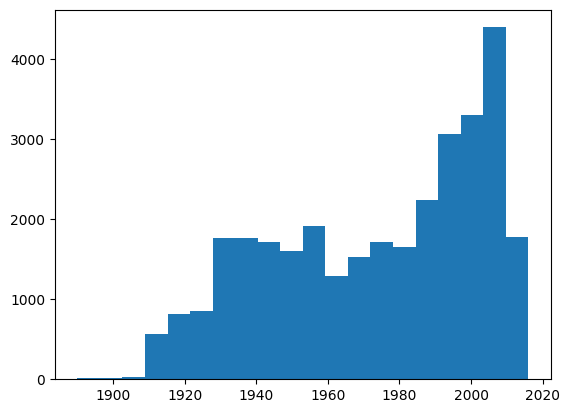

In [70]:
plt.hist(hof['year'], bins=20)

In [80]:
nan_counts = hof.groupby('year')['revenue'].apply(lambda x: (x.isna().sum())/len(x)).reset_index()
nan_counts

,year,revenue
0,1890,1.000000
1,1891,1.000000
2,1893,1.000000
3,1894,1.000000
4,1895,1.000000
...,...,...
117,2011,0.439418
118,2012,0.401985
119,2013,0.095238
120,2014,0.166667


<BarContainer object of 122 artists>

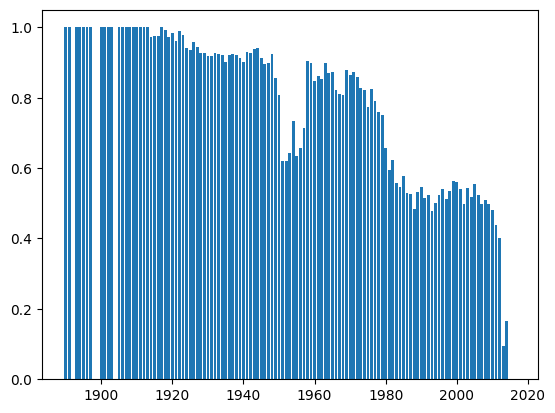

In [77]:
plt.bar(x=nan_counts['year'], height=nan_counts['revenue'])

In [5]:
movies = pd.read_csv('movies_with_flag.csv')

# Rest

In [ ]:
sum(movies['id_imdb'].isna())

20694

In [ ]:
characters = pd.read_table(data_dir + 'character.metadata.tsv')

In [ ]:
characters


,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,Unnamed: 7,Wanda De Jesus,42,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450663,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450664,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450665,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450666,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


# Merge with IMDB Director / Writer data

In [3]:
# roles = pd.read_table('./roles.tsv')
# roles = roles.rename(columns={'directors':"directors_imdb", 'writers':'writers_imdb'})
# movies = movies.merge(roles, left_on='id_imdb', right_on='tconst', how='inner')
# movies = movies[['title','year','time','runtime','revenue','budget','rating','votes','id_wikipedia','id_freebase','id_imdb','languages','actors','crew','writers_imdb','directors','directors_imdb','production_companies','prod_country','is_hollywood_hof']]

# Merge with IMDB ratings

In [21]:
# ratings = pd.read_table('./ratings.tsv')
# ratings = ratings.rename(columns={'averageRating':'rating_imdb', 'numVotes':'votes_imdb', 'tconst':'id_imdb'})
# movies = movies.merge(ratings, on='id_imdb')
# movies = movies.rename(columns={'rating':'rating_tmdb', 'votes':'votes_tmdb'})
# movies = movies[['title','year','time','runtime', 'revenue', 'budget', 'rating_imdb', 'votes_imdb', 'rating_tmdb', 'votes_tmdb', 'id_wikipedia', 'id_freebase', 'id_imdb', 'languages', 'actors', 'crew', 'writers_imdb', 'directors', 'directors_imdb', 'production_companies', 'prod_country','is_hollywood_hof']]

# Save DF

In [32]:
# save df
movies.to_csv('movies_with_flag.csv', index=False)